Import libraries.

In [1]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np

Load the data.

In [2]:
data = np.load("../Mock_Data/dataset_all_H1_bootstrap_O3a.npy")
data_length = len(data)
data_length

37800

Turn on the pyplot interaction mode.

In [3]:
plt.ion()

In [4]:
x = np.arange(data_length)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


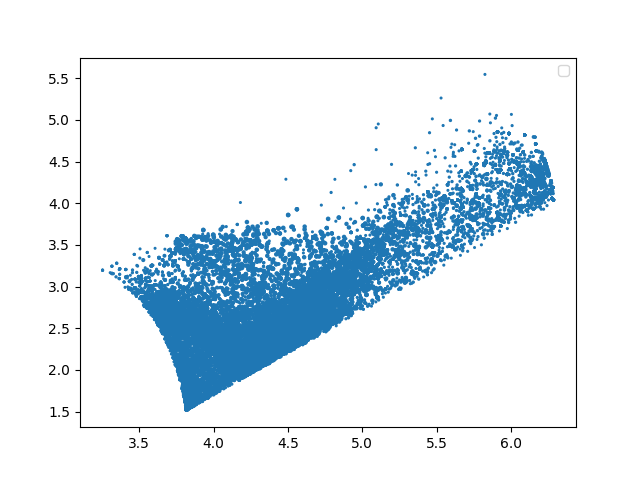

In [5]:
fig, ax = plt.subplots()
# ax.plot(x, data[:,0], label='SNR')
# ax.plot(x, data[:,1], label='Chisq')
# ax.plot(x, data[:,2], label='Mass1')
# ax.plot(x, data[:,3], label='Mass2')
# ax.plot(x, data[:,4], label='Spin1z')
# ax.plot(x, data[:,5], label='Spin2z')
# ax.plot(x, data[:,6], label='Class')

x = np.log(data[:,2])
y = np.log(data[:,3])
snr = np.log(data[:,0])

ax.scatter(x,y,s=snr)

ax.legend()

Now, plot the real data.

In [6]:
data_H1_O3a = np.load("../data/dataset_all_H1_bootstrap_O3a.npy")
data_H1_O3b = np.load("../data/dataset_all_H1_bootstrap_O3a.npy")
data_L1_O3a = np.load("../data/dataset_all_H1_bootstrap_O3a.npy")
data_L1_O3b = np.load("../data/dataset_all_H1_bootstrap_O3a.npy")
data_V1_O3a = np.load("../data/dataset_all_H1_bootstrap_O3a.npy")
data_V1_O3b = np.load("../data/dataset_all_H1_bootstrap_O3a.npy")

In [7]:
#data_length

In [8]:
import torch
torch.cuda.is_available()

ModuleNotFoundError: No module named 'torch'

In [ ]:
import numpy as np
data_a = np.load("../data/dataset_all_H1_bootstrap_O3a.npy")
data_b = np.load("../data/dataset_all_H1_bootstrap_O3b.npy")


In [ ]:
len(data_a)

In [ ]:

total = np.vstack([data_a,data_b])
len(total)

In [ ]:
total[0,:]

In [ ]:
import pandas as pd

pd.DataFrame(total)

In [ ]:
np.random.shuffle(total)
pd.DataFrame(total)

In [ ]:
data_length = len(total)
data_length

In [ ]:
training_set_length = int(data_length * 0.7)
validating_set_length = int(data_length * 0.2)
testing_set_length = data_length - training_set_length - validating_set_length

In [ ]:
training_set = total[0:training_set_length,:]
validating_set = total[training_set_length:training_set_length + validating_set_length,:]
testing_set = total[training_set_length + validating_set_length:,:]

len(training_set) + len(validating_set) + len(testing_set)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
training_set_A = training_set[:,0:6]
training_set_B = training_set[:,6]
input_tensor = torch.tensor(training_set_A, dtype=torch.float32).to(device)
label_tensor = torch.tensor(training_set_B, dtype=torch.int64).to(device)

input_val_tensor = torch.tensor(validating_set[:,0:6], dtype=torch.float32).to(device)
label_val_tensor = torch.tensor(validating_set[:,6], dtype=torch.int64).to(device)

input_test_tensor = torch.tensor(testing_set[:,0:6], dtype=torch.float32).to(device)
label_test_tensor = torch.tensor(testing_set[:,6], dtype=torch.int64).to(device)

dataset = TensorDataset(input_tensor, label_tensor)
dataset_val = TensorDataset(input_val_tensor, label_val_tensor)
dataset_test = TensorDataset(input_test_tensor, label_test_tensor)

train_loader = DataLoader(dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(dataset_val, batch_size=32, shuffle=True)
test_loader = DataLoader(dataset_test, batch_size=32, shuffle=True)

Define the model

In [ ]:
del(model)

NameError: name 'model' is not defined

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.fc1 = nn.Linear(6, 128)
        self.fc2 = nn.Linear(128,256)
        self.fc3 = nn.Linear(256, 128)
        self.fc4 = nn.Linear(128, 7)
        
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x

In [ ]:
model = Net().to(device)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = 0.002)

In [ ]:
from tqdm import tqdm

In [ ]:
for epoch in tqdm(range(10), desc="Training ..."):
    for data in train_loader:
        inputs, labels = data[0].to(device), data[1].to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        if (epoch + 1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')


Training ...: 100%|██████████| 1000/1000 [1:10:54<00:00,  4.25s/it]


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

In [ ]:
model.eval()
all_predictions = []
all_labels = []

In [ ]:
with torch.no_grad():
    for inputs, labels in val_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        
        all_predictions.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

Calculate accuracy

In [ ]:
accuracy = accuracy_score(all_labels, all_predictions)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8410714285714286


In [ ]:
print(classification_report(all_labels, all_predictions))

              precision    recall  f1-score   support

           0       0.58      0.88      0.70      2160
           1       0.90      0.90      0.90      2207
           2       0.90      0.96      0.93      2183
           3       0.96      0.42      0.58      2172
           4       0.93      0.98      0.96      2110
           5       0.85      0.80      0.83      2137
           6       0.96      0.96      0.96      2151

    accuracy                           0.84     15120
   macro avg       0.87      0.84      0.84     15120
weighted avg       0.87      0.84      0.84     15120



In [ ]:
print(confusion_matrix(all_labels, all_predictions))

[[1903   18   39   21   55   87   37]
 [  58 1977   57    1   13  100    1]
 [  10   21 2086    2   54    4    6]
 [1109   13   12  906    7  101   24]
 [   7    0   32    0 2061    0   10]
 [ 215  169   15   11    3 1720    4]
 [   0    0   75    0   12    0 2064]]


Save the model

In [ ]:
torch.save(model.state_dict(),"../models/model2312082058local")

Load the model

In [ ]:
model = Net().to(device)
model.load_state_dict(torch.load("../models/model2312082058local"))

<All keys matched successfully>